***

*Course:* [Math 444](https://people.math.wisc.edu/~hlyu36/GNiDS/) - Graphs and Networks in Data Science (MMiDS) - Fall 2023

*Author:* [Hanbaek Lyu](https://hanbaeklyu.com), Department of Mathematics, University of Wisconsin-Madison  

***

In [377]:
### Load some packages 

import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec


# Stochastic Block Model

In [590]:
def list2onehot(y, list_classes=None):
    """
    y = list of class lables of length n
    output = n x k array, i th row = one-hot encoding of y[i] (e.g., [0,0,1,0,0])
    """
    if list_classes is None:
        list_classes = list(np.sort(c))
    Y = np.zeros(shape = [len(y), len(list_classes)], dtype=int)
    for i in np.arange(Y.shape[0]):
        for j in np.arange(len(list_classes)):
            if y[i] == list_classes[j]:
                Y[i,j] = 1
    return Y

In [591]:
c

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [592]:
c = [2,3,1]
print(list2onehot(c))

[[0 1 0]
 [0 0 1]
 [1 0 0]]


In [593]:
def SBM(W, c):
    # Stochastic block model; 
    # W = (k x k) community weight matrix 
    # c = (n x 1), entries from [k]; community assignment vector
    k = W.shape[0]
    n = len(c)
    
    # C = (n x k) one-hot encoding of community assignment matrix
    C = list2onehot(c, list_classes=[i for i in range(k)])

    # C = (n x n) probability matrix = expected adjacency matrix = C W C.T
    P = C @ W @ C.T
    
    # Now sample the edges according to P
    G = nx.Graph()
    G.add_nodes_from(range(n))
    nodes = list(G.nodes())
    
    for i in np.arange(n):
        for j in np.arange(i+1,n):
            U = np.random.rand()
            if U < P[i,j]:
                G.add_edge(nodes[i],nodes[j])
    return G

In [594]:
np.eye(3,3,1)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [595]:
a = 0.8
b = 0.1
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])

In [596]:
W

array([[0.8, 0.1, 0.1],
       [0.1, 0.8, 0.1],
       [0.1, 0.1, 0.8]])

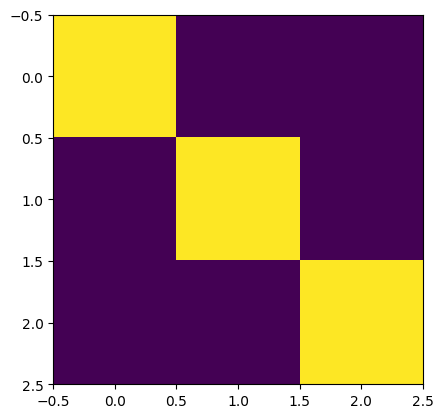

In [597]:
plt.imshow(W)

In [598]:
r = 10
c = [0]*r + [1]*r + [2]*r

In [599]:
G = SBM(W,c)

In [600]:
C = list2onehot(c, list_classes=[i for i in range(3)])

In [601]:
C

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/3408396143.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))


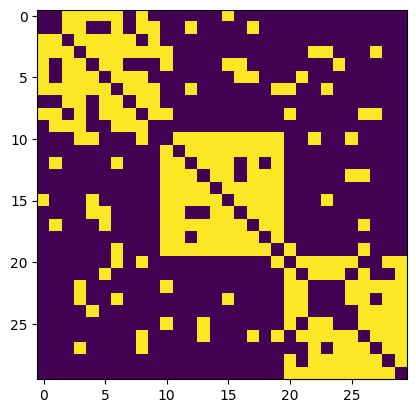

In [602]:
A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
plt.imshow(A1.todense())

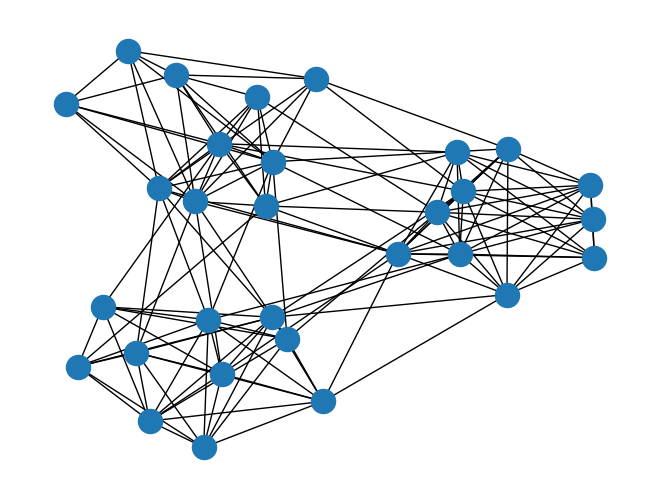

In [603]:
nx.draw(G)

In [604]:
list(G.nodes())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [605]:
def permute_nodes(G):
    node_mapping = dict(zip(G.nodes(), sorted(G.nodes(), key=lambda k: np.random.random())))
    G1 = nx.Graph()
    G1.add_nodes_from(range(n))
    #nodes = list(G.nodes())
    
    for e in G.edges():
        u = node_mapping.get(e[0])
        v = node_mapping.get(e[1])
        G1.add_edge(u,v)
    return G1

In [606]:
G1 = permute_nodes(G)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/560598141.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G.nodes()))


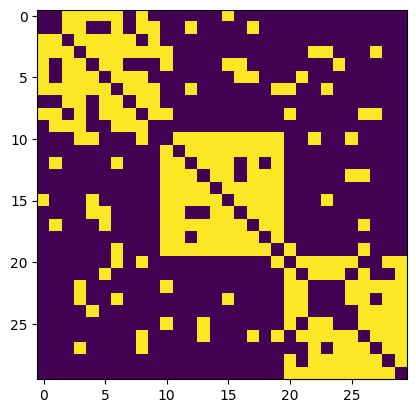

In [607]:
A = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
plt.imshow(A.todense())

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/3804305999.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))


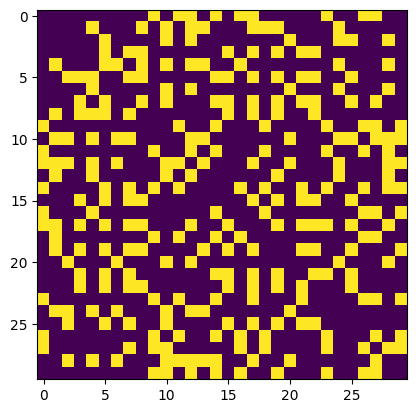

In [608]:
A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))
plt.imshow(A1.todense())

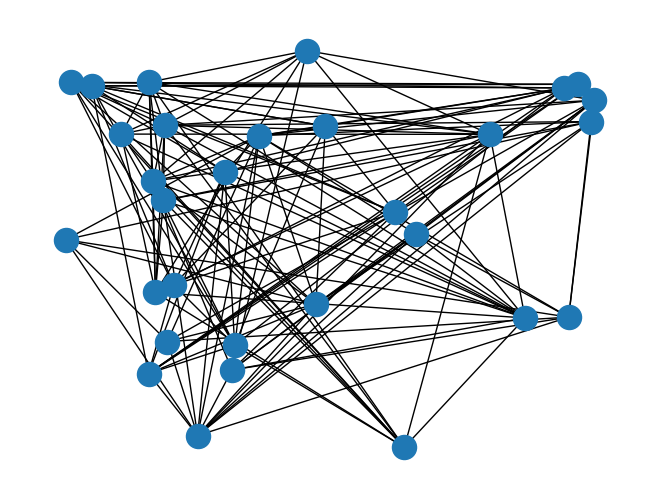

In [610]:
nx.draw(G1,pos=nx.random_layout(G1))

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/191623285.py:25: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))


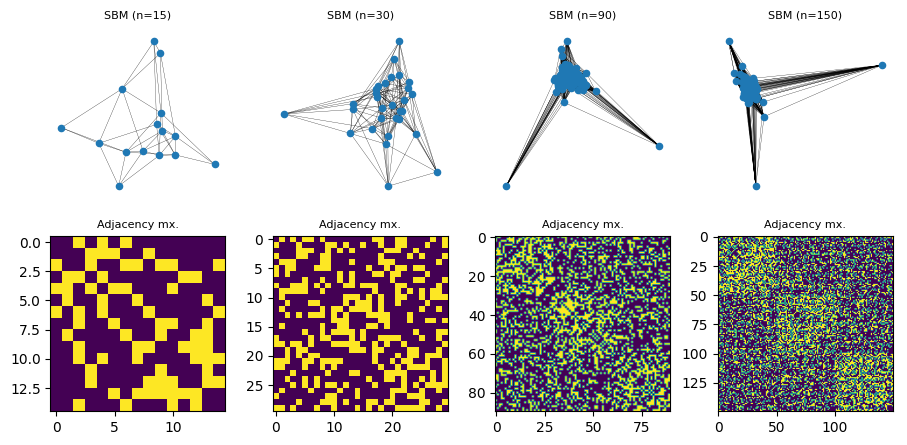

In [585]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
r_list=[5, 10, 30, 50]

a = 0.5
b = 0.3
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

outer_grid = gridspec.GridSpec(nrows=2, ncols=len(r_list), wspace=0.2, hspace=0.2)

for i in np.arange(len(r_list)): 
    r = r_list[i]
    c = [0]*r + [1]*r + [2]*r # community assignment vector
    
    G = SBM(W, c)    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.2 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.spectral_layout(G))
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)

    
    A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Adjacency mx.", fontsize=8)


plt.savefig("SBM_ex1", bbox_inches="tight")

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/1698878139.py:25: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))


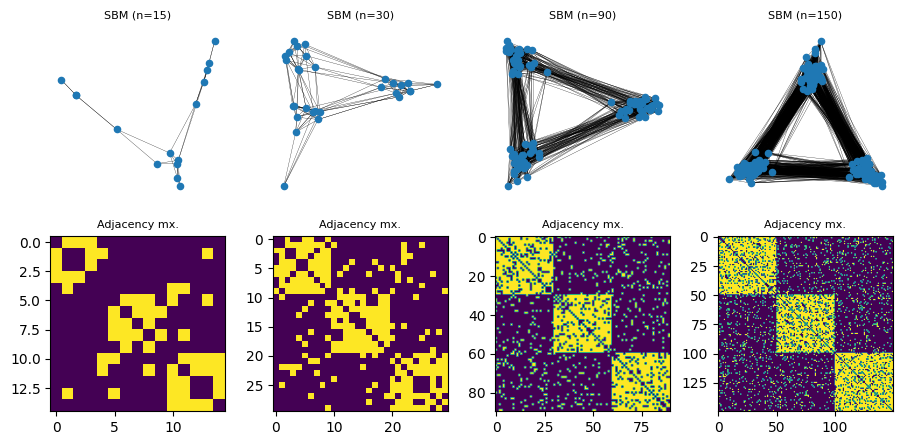

In [388]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
r_list=[5, 10, 30, 50]

a = 0.8
b = 0.1
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

outer_grid = gridspec.GridSpec(nrows=2, ncols=len(r_list), wspace=0.2, hspace=0.2)

for i in np.arange(len(r_list)): 
    r = r_list[i]
    c = [0]*r + [1]*r + [2]*r # community assignment vector
    
    G = SBM(W, c)    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.2 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.spectral_layout(G))
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)

    
    A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Adjacency mx.", fontsize=8)


plt.savefig("SBM_ex2", bbox_inches="tight")

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/3332391422.py:30: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/3332391422.py:47: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))


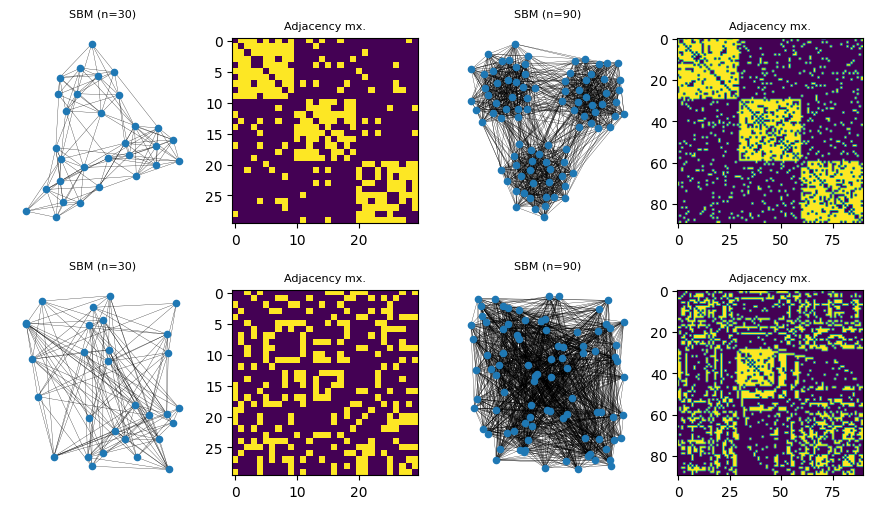

In [611]:
fig = plt.figure(figsize=[11,6], constrained_layout=False)
network_list = [""]
r_list=[10, 30]

a = 0.8
b = 0.1
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

outer_grid = gridspec.GridSpec(nrows=2, ncols=len(r_list)*2, wspace=0.2, hspace=0.2)

for i in np.arange(len(r_list)): 
    r = r_list[i]
    c = [0]*r + [1]*r + [2]*r # community assignment vector
    G = SBM(W, c) 
    
    # create a random mapping old label -> new label
    G1 = permute_nodes(G)
    
    
    inner_grid = outer_grid[0,2*i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.2 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)
    
    inner_grid = outer_grid[0,2*i+1].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Adjacency mx.", fontsize=8)

    ### Do the same for the node-permuted graph

    inner_grid1 = outer_grid[1,2*i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    edges = G1.edges()
    weights = [0.2 for u,v in G1.edges]
    nx.draw(G1, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.random_layout(G1))
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)
    
    inner_grid = outer_grid[1,2*i+1].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Permuted Adj. mx.", fontsize=8)



plt.savefig("SBM_ex3", bbox_inches="tight")

# Barabasi-Albert model

In [2]:
def BA(G0=None, m0=1, m=1, n=100, alpha=1):
    # Barabasi-Albert model with baseline graph G = single node with m0 self-loops 
    # Each new node has m edges pointing to some nodes in the existing graph 
    # alpha=1 -> preferential attachment: The head of each new directed edge is chosen randomly with probability 
    # proportional to the degree
    # alpha=0 ->: Uniform attachment: The head of each new directed edge is chosen uniformly at random
    # alpha \notin\{0,1} -> nonlinear preferential attachment: The head of each new directed edge is chosen 
    # randomly with probability proportional to the degree^alpha
    
    if G0 is not None: 
        G = G0
    else: 
        G = nx.MultiGraph() # baseline graph with a single node and m0 self-loops 
        for i in np.arange(m0):
            G.add_edge(1,1)
        
    for s in np.arange(1,n):
        for j in np.arange(m):
            # form a degree distribution 
            degrees = np.asarray([G.degree(n)**(alpha) for n in G.nodes()])
            deg_dist = degrees*(1/np.sum(degrees))
            v = np.random.choice(G.nodes(), p=deg_dist)
            G.add_edge(s,v)
        
    return G
    

In [147]:
degrees = np.asarray([G.degree(v) for v in G.nodes()])

In [149]:
deg_dist = degrees/np.sum(degrees)

In [151]:
np.sum(deg_dist)

1.0

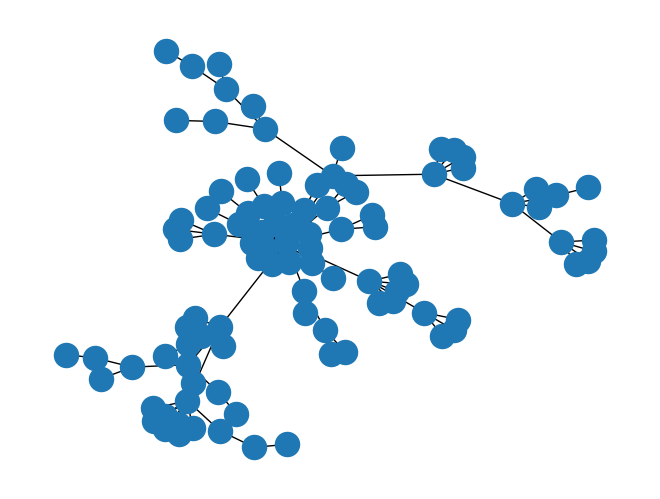

In [160]:
G = BA(alpha=1)
nx.draw(G)

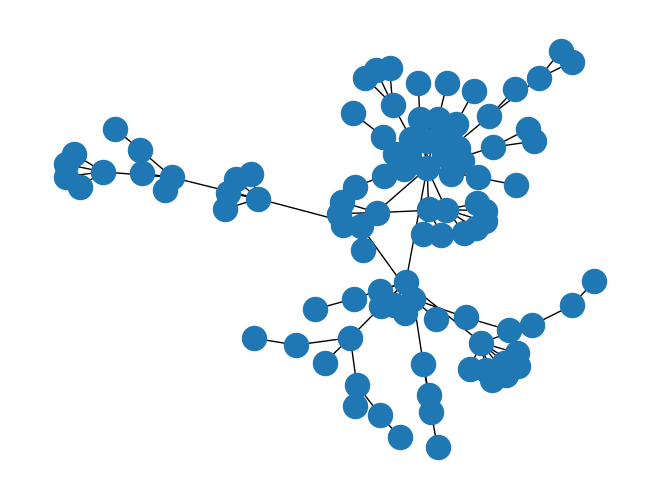

In [164]:
H = nx.Graph()
for e in G.edges():
    H.add_edge(e[0],e[1])

nx.draw(H)

In [163]:
list(G.edges())

[(1, 1),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 16),
 (1, 23),
 (1, 25),
 (1, 27),
 (1, 33),
 (1, 45),
 (1, 51),
 (1, 52),
 (1, 55),
 (1, 64),
 (1, 68),
 (1, 69),
 (1, 70),
 (1, 76),
 (1, 78),
 (1, 92),
 (2, 17),
 (2, 18),
 (2, 24),
 (2, 30),
 (2, 58),
 (2, 99),
 (3, 75),
 (4, 6),
 (4, 7),
 (4, 12),
 (4, 21),
 (4, 86),
 (4, 89),
 (4, 90),
 (5, 49),
 (5, 61),
 (6, 79),
 (7, 13),
 (7, 28),
 (7, 39),
 (7, 41),
 (7, 43),
 (7, 44),
 (7, 56),
 (7, 97),
 (8, 31),
 (8, 48),
 (9, 29),
 (9, 37),
 (9, 50),
 (10, 11),
 (10, 15),
 (10, 36),
 (11, 14),
 (11, 34),
 (11, 35),
 (11, 46),
 (11, 72),
 (12, 20),
 (12, 32),
 (12, 88),
 (13, 47),
 (14, 19),
 (14, 26),
 (14, 53),
 (14, 59),
 (15, 22),
 (15, 74),
 (15, 94),
 (19, 40),
 (20, 54),
 (20, 93),
 (22, 38),
 (22, 57),
 (26, 65),
 (26, 67),
 (26, 81),
 (26, 84),
 (27, 73),
 (27, 91),
 (30, 42),
 (30, 71),
 (30, 83),
 (32, 63),
 (38, 60),
 (45, 66),
 (47, 87),
 (49, 77),
 (49, 85),
 (52, 62),
 (54, 96),
 (55, 95)

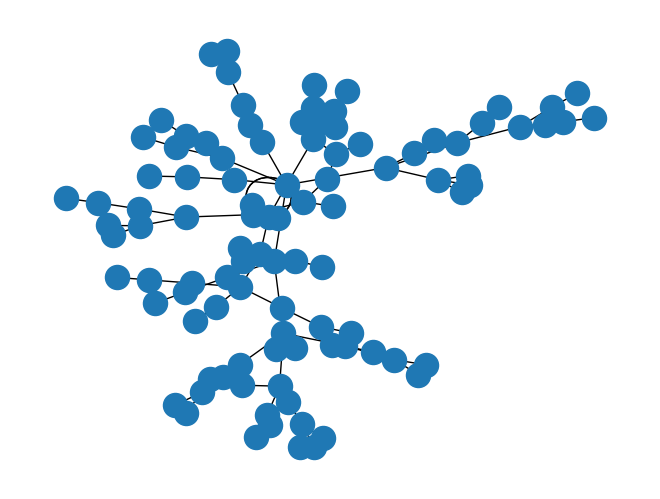

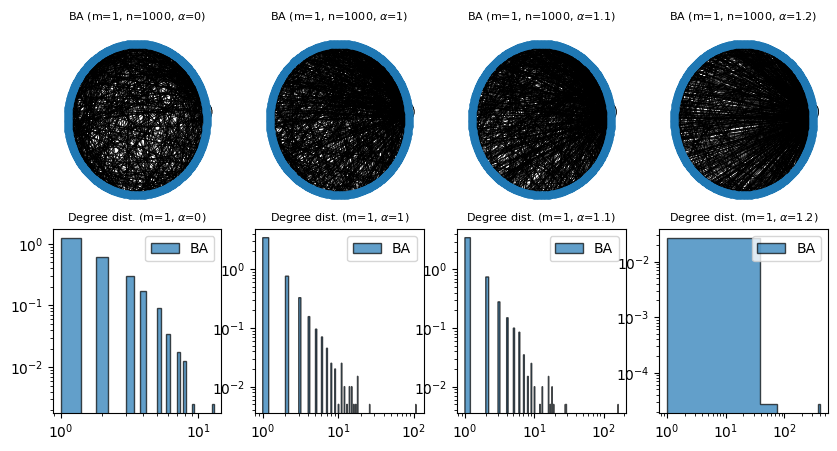

In [129]:
fig = plt.figure(figsize=[10,5], constrained_layout=False)
network_list = [""]
n=1000
m=1
alpha_list = [0, 1, 1.1, 1.2]
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(alpha_list), wspace=0.2, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(alpha_list)): 
    G = BA(m0=1, m=m, n=n, alpha=alpha_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title(r"BA (m={}, n={}, $\alpha$={})".format(m, n, alpha_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(r"Degree dist. (m={}, $\alpha$={})".format(m, alpha_list[i]), fontsize=8)


plt.savefig("BA_graph_deg", bbox_inches="tight")

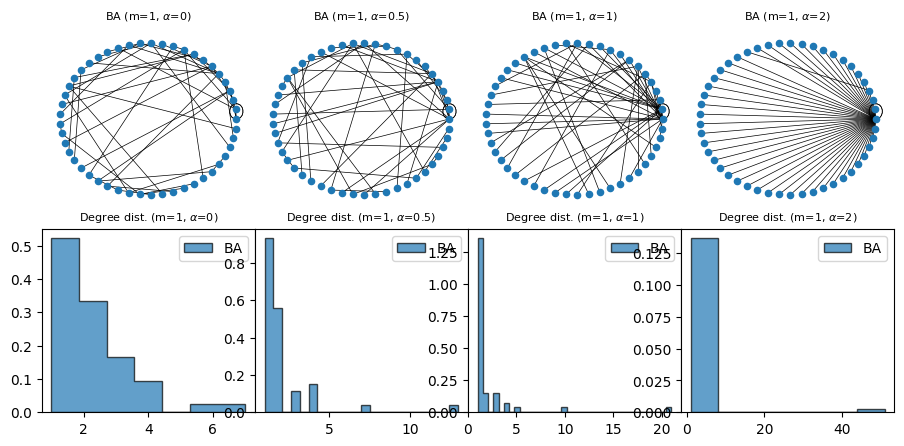

In [102]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
alpha_list=[0, 0.5, 1, 2]
m=1
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(alpha_list), wspace=0, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(alpha_list)): 
    G = BA(m0=1, m=m, n=50, alpha = alpha_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title(r"BA (m={}, $\alpha$={})".format(m, alpha_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title(r"Degree dist. (m={}, $\alpha$={})".format(m, alpha_list[i]), fontsize=8)


plt.savefig("BA_graph_alpha_{}".format(m), bbox_inches="tight")

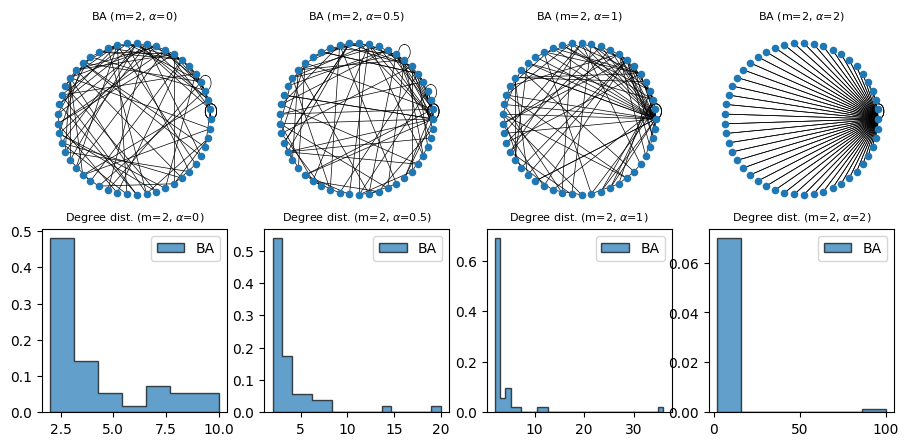

In [107]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
alpha_list=[0, 0.5, 1, 2]
m=2
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(alpha_list), wspace=0.2, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(alpha_list)): 
    G = BA(m0=1, m=m, n=50, alpha = alpha_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title(r"BA (m={}, $\alpha$={})".format(m, alpha_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title(r"Degree dist. (m={}, $\alpha$={})".format(m, alpha_list[i]), fontsize=8)


plt.savefig("BA_graph_alpha_{}".format(m), bbox_inches="tight")

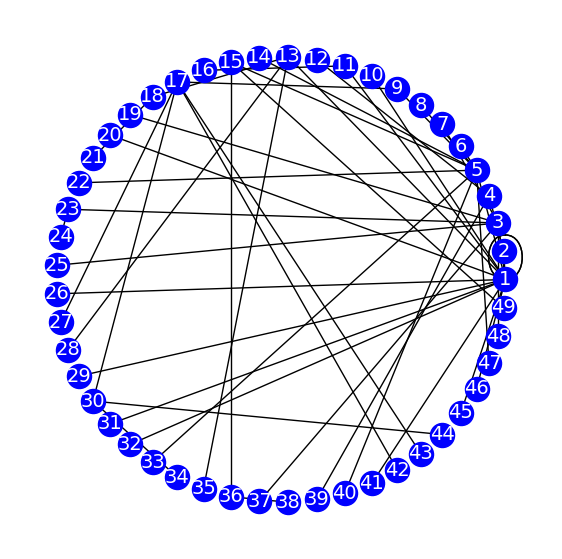

In [67]:
G = BA(m0=1, m=1, n=50)

fig = plt.figure(figsize=[7,7], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.circular_layout(G),
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

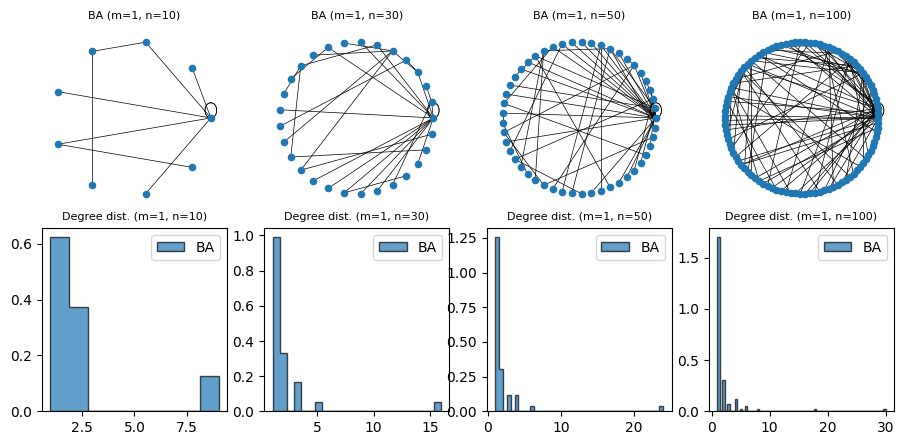

In [109]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_list=[10, 30, 50, 100]
m=1
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(n_list), wspace=0.2, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(n_list)): 
    G = BA(m0=1, m=m, n=n_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title("BA (m={}, n={})".format(m, n_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title("Degree dist. (m={}, n={})".format(m, n_list[i]), fontsize=8)


plt.savefig("BA_graph_deg", bbox_inches="tight")

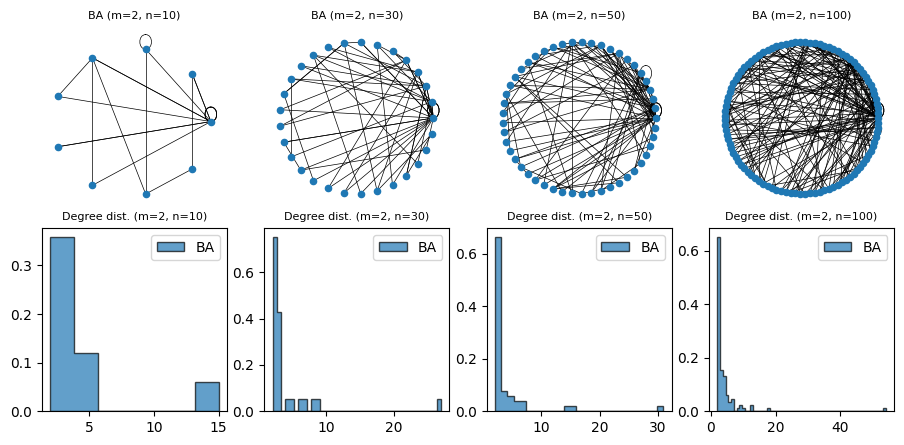

In [110]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_list=[10, 30, 50, 100]
m=2
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(n_list), wspace=0.2, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(n_list)): 
    G = BA(m0=1, m=m, n=n_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title("BA (m={}, n={})".format(m, n_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title("Degree dist. (m={}, n={})".format(m, n_list[i]), fontsize=8)


plt.savefig("BA_graph_deg2", bbox_inches="tight")

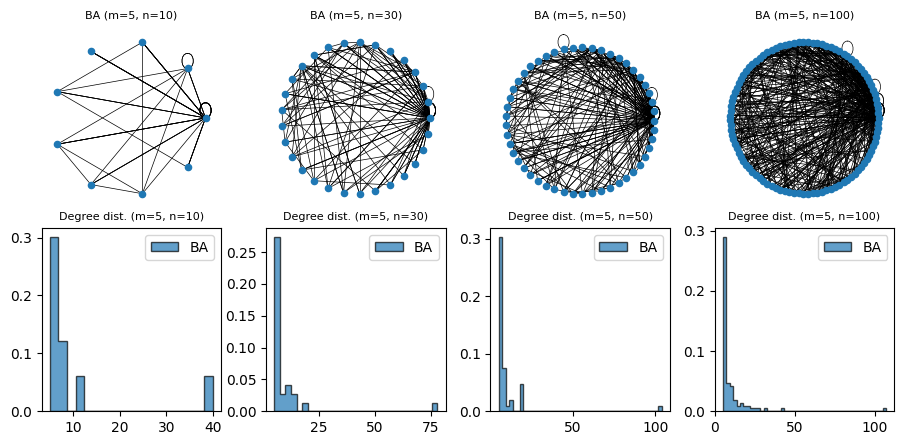

In [112]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_list=[10, 30, 50, 100]
m=5
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(n_list), wspace=0.25, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(n_list)): 
    G = BA(m0=1, m=m, n=n_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title("BA (m={}, n={})".format(m, n_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title("Degree dist. (m={}, n={})".format(m, n_list[i]), fontsize=8)


plt.savefig("BA_graph_deg_{}".format(m), bbox_inches="tight")

# Clustering coefficients of ER, WS, and BA

In [198]:
from tqdm import trange

100%|█████████████████████████████████████████████| 4/4 [00:12<00:00,  3.22s/it]


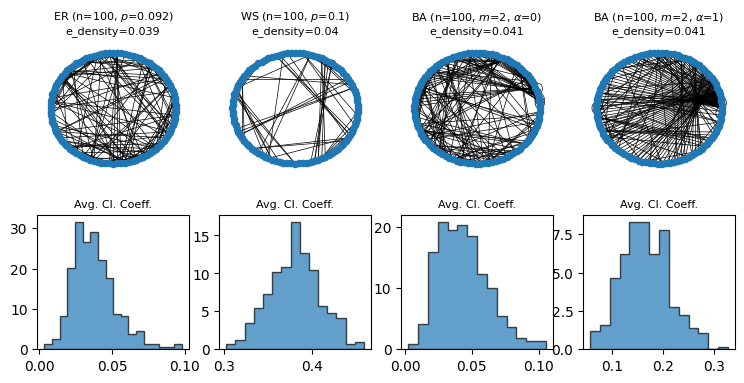

In [201]:
fig = plt.figure(figsize=[9,4], constrained_layout=False)
network_list = [""]
n = 100
m=2
sample_size = 300

outer_grid = gridspec.GridSpec(nrows=2, ncols=4, wspace=0.2, hspace=0.3)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

for i in trange(4): 
    clustering_list = [] 
    path_length_list = []
    for j in np.arange(sample_size):
        
        if i == 0: # ER
            p = 2*np.log(n)/n
            G = nx.erdos_renyi_graph(n=n,p=2*m/(n-1))
            title = r"ER (n={}, $p$={})".format(n, np.round(p,3))
        elif i == 1: # WS
            G0 = nx.circulant_graph(n, [1,2])
            G1 = random_orientation(G0)
            p = 0.1
            G = WS(G1, p=p, random_orientation=False)
            title = r"WS (n={}, $p$={})".format(n, np.round(p,3))
        elif i == 2: # BA with uniform attachment
            G = BA(m0=1, m=m, n=n, alpha = 0)
            title = r"BA (n={}, $m$={}, $\alpha$={})".format(n, m, 0)
        elif i == 3: # BA with preferential attachment
            G = BA(m0=1, m=m, n=n, alpha = 1)
            title = r"BA (n={}, $m$={}, $\alpha$={})".format(n, m, 1)
            
        title = title + "\n" +  "e_density={}".format(np.round(nx.density(G),3))

        # convert multigraph from BA to simple graph
        G00 = nx.Graph()
        for e in G.edges():    
            G00.add_edge(e[0],e[1])
        G = G00
            
        clustering_list.append(nx.average_clustering(G))
        if nx.is_connected(G):
            path_length_list.append(nx.average_shortest_path_length(G))
        else:
            path_length_list.append(0)
    
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title(title, fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0.1, hspace=0.1)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(clustering_list, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    ax.set_title(r"Avg. Cl. Coeff.", fontsize=8)
    
    #inner_grid2 = outer_grid[2,i].subgridspec(1, 1, wspace=0, hspace=0)
    #ax = fig.add_subplot(inner_grid2[0, 0])
    #ax.hist(path_length_list, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    #ax.set_title(r"Avg. path length", fontsize=8)

plt.savefig("cl_pl_comparison1", bbox_inches="tight")

100%|█████████████████████████████████████████████| 4/4 [04:29<00:00, 67.37s/it]


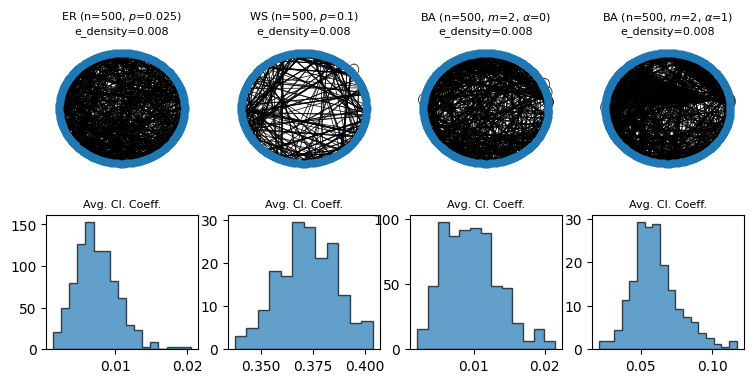

In [208]:
fig = plt.figure(figsize=[9,4], constrained_layout=False)
network_list = [""]
n = 500
m=2
sample_size = 300

outer_grid = gridspec.GridSpec(nrows=2, ncols=4, wspace=0.2, hspace=0.3)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

for i in trange(4): 
    clustering_list = [] 
    path_length_list = []
    for j in np.arange(sample_size):
        
        if i == 0: # ER
            p = 2*np.log(n)/n
            G = nx.erdos_renyi_graph(n=n,p=2*m/(n-1))
            title = r"ER (n={}, $p$={})".format(n, np.round(p,3))
        elif i == 1: # WS
            G0 = nx.circulant_graph(n, [1,2])
            G1 = random_orientation(G0)
            p = 0.1
            G = WS(G1, p=p, random_orientation=False)
            title = r"WS (n={}, $p$={})".format(n, np.round(p,3))
        elif i == 2: # BA with uniform attachment
            G = BA(m0=1, m=m, n=n, alpha = 0)
            title = r"BA (n={}, $m$={}, $\alpha$={})".format(n, m, 0)
        elif i == 3: # BA with preferential attachment
            G = BA(m0=1, m=m, n=n, alpha = 1)
            title = r"BA (n={}, $m$={}, $\alpha$={})".format(n, m, 1)
            
        title = title + "\n" +  "e_density={}".format(np.round(nx.density(G),3))

        # convert multigraph from BA to simple graph
        G00 = nx.Graph()
        for e in G.edges():    
            G00.add_edge(e[0],e[1])
        G = G00
            
        clustering_list.append(nx.average_clustering(G))
        if nx.is_connected(G):
            path_length_list.append(nx.average_shortest_path_length(G))
        else:
            path_length_list.append(0)
    
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title(title, fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0.1, hspace=0.1)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(clustering_list, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    ax.set_title(r"Avg. Cl. Coeff.", fontsize=8)
    
    #inner_grid2 = outer_grid[2,i].subgridspec(1, 1, wspace=0, hspace=0)
    #ax = fig.add_subplot(inner_grid2[0, 0])
    #ax.hist(path_length_list, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    #ax.set_title(r"Avg. path length", fontsize=8)

plt.savefig("cl_pl_comparison2", bbox_inches="tight")

# Random Walk Attachement model

In [295]:
def RWA(G0=None, m0=1, m=1, n=100, p=0.9):
    # Random Walk Attachement model with baseline graph G = single node with m0 self-loops 
    # Each new node has m edges pointing to some nodes in the existing graph 
    # When adding a new node $u$, we add edges {u,v_1}, \dots, {u,v_m} 
    # v_1 is uniformly chosen among all nodes in G
    # v_2 is uniformly chosen among all neighbors of v_1 with probability p; 
    # (p is the probability of closing a triangle)
    # with the rest of probability, v_2 is chosen the same way as v_1
    # Do the same for the rest of v_3,..,v_m. 
    
    if G0 is not None: 
        G = G0
    else: 
        G = nx.MultiGraph() # baseline graph with a single node and m0 self-loops 
        for i in np.arange(m0):
            G.add_edge(1,1)
        
    for s in np.arange(1,n-m0):
        v = np.random.choice(G.nodes())
        for j in np.arange(m):
            U = np.random.rand()
            if (j == 1) or (U>p):
                candidates = list(G.nodes())
            else: 
                candidates = list(G.neighbors(v))
            if (len(candidates)>1) and (s in candidates):
                candidates.remove(s)
            v = np.random.choice(candidates)
            G.add_edge(s,v)
        
    return G
    

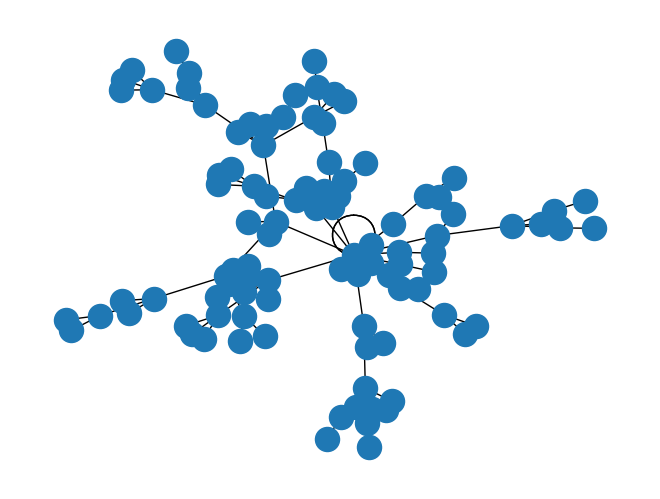

In [280]:
G = RWA(p=0.5)
nx.draw(G)

100%|█████████████████████████████████████████████| 5/5 [01:54<00:00, 22.81s/it]


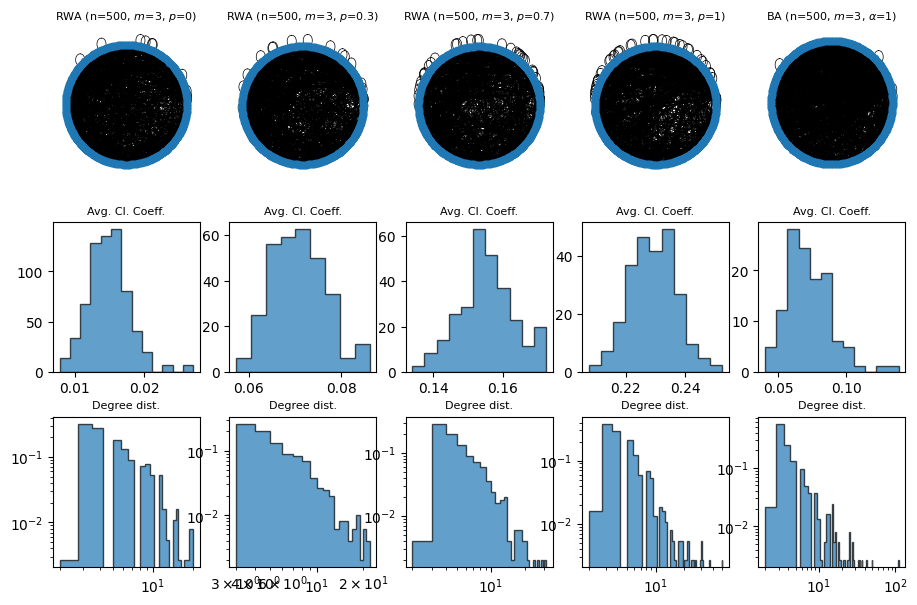

In [236]:
fig = plt.figure(figsize=[11,7], constrained_layout=False)
network_list = [""]
n = 500
m=3
p_list = [0, 0.3, 0.7, 1]
sample_size = 100

outer_grid = gridspec.GridSpec(nrows=3, ncols=len(p_list)+1, wspace=0.2, hspace=0.3)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

for i in trange(len(p_list)+1): 
    clustering_list = [] 
    path_length_list = []
    for j in np.arange(sample_size):
        if i < len(p_list):
            G = RWA(m0=1, m=m, n=n, p = p_list[i])
            title = r"RWA (n={}, $m$={}, $p$={})".format(n, m, p_list[i])   
        else:
            alpha = 1
            G = BA(m0=1, m=m, n=n, alpha = alpha)
            title = r"BA (n={}, $m$={}, $\alpha$={})".format(n, m, alpha)

        # convert multigraph from BA to simple graph
        G00 = nx.Graph()
        for e in G.edges():    
            G00.add_edge(e[0],e[1])
        G = G00

        clustering_list.append(nx.average_clustering(G))
        if nx.is_connected(G):
            path_length_list.append(nx.average_shortest_path_length(G))
        else:
            path_length_list.append(0)

    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title(title, fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0.1, hspace=0.1)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(clustering_list, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    ax.set_title(r"Avg. Cl. Coeff.", fontsize=8)
    
    degrees = [G.degree(n) for n in G.nodes()]
    inner_grid1 = outer_grid[2,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='RWA', edgecolor="k", histtype='stepfilled', density=True)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(r"Degree dist.", fontsize=8)

    
    #inner_grid2 = outer_grid[2,i].subgridspec(1, 1, wspace=0, hspace=0)
    #ax = fig.add_subplot(inner_grid2[0, 0])
    #ax.hist(path_length_list, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    #ax.set_title(r"Avg. path length", fontsize=8)
    



plt.savefig("RWA_comparison2", bbox_inches="tight")

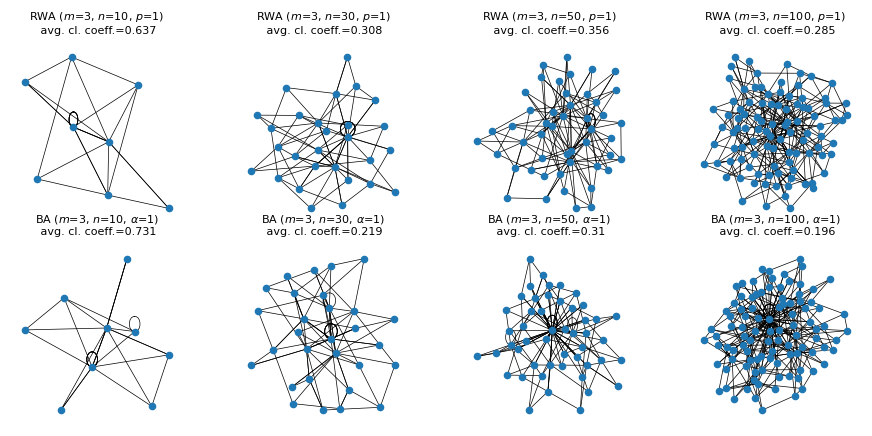

In [296]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_list=[10, 30, 50, 100]
m=3
p=1
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(n_list), wspace=0.3, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

for i in np.arange(len(n_list)): 
    for j in np.arange(2):
        if j == 0:
            G = RWA(m0=1, m=m, n=n_list[i], p=0.9)
            title = r"RWA ($m$={}, $n$={}, $p$={})".format(m, n_list[i], p)
        else: 
            G = BA(m0=1, m=m, n=n_list[i], alpha=1)
            title = r"BA ($m$={}, $n$={}, $\alpha$={})".format(m, n_list[i], 1)
        G00 = nx.Graph()
        
        for e in G.edges():    
            G00.add_edge(e[0],e[1])
        G0 = G00
        degrees = [G.degree(n) for n in G.nodes()]

        inner_grid = outer_grid[j,i].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        #edges = G.edges()
        #weights = [0.5 for u,v in G.edges]
        nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')
        #ax.legend()
        title = title + "\n avg. cl. coeff.={}".format(np.round(nx.average_clustering(G0),3))
        ax.set_title(title, fontsize=8)
    



plt.savefig("RWA_comparison0", bbox_inches="tight")

# Random walk on graphs

In [287]:
def RW(G, x0=None, steps=1, return_history=False):
    # simple symmetric random walk on graph G 
    # initialization at x0
    if x0 is None:
        x = np.random.choice(G.nodes())
    else:
        x = x0
    
    history = []
    for i in np.arange(steps):
        if len(list(G.neighbors(x))) == 1:
            print("RW is stuck at isolated node")
            x = np.random.choice(G.nodes()) # re-initialize uniformly at random
        else: 
            x = np.random.choice(list(G.neighbors(x)))

        if return_history:
            history.append(x)
        
    if not return_history: 
        return x 
    else: 
        return history

In [291]:
history = RW(G, x0=None, steps=20, return_history=True)

In [297]:
d = [1,2,3]

In [311]:
stubs_list = []
for i in np.arange(len(d)):
    for j in np.arange(d[i]):
        stubs_list.append([i,j])

In [312]:
stubs_list

[[0, 0], [1, 0], [1, 1], [2, 0], [2, 1], [2, 2]]

In [315]:
np.random.choice(np.asarray(len(stubs_list)), 2)

array([0, 4])

In [304]:
np.asarray([len(s) for s in stubs_list])

array([1, 2, 3])

In [321]:
ss = np.random.choice(np.asarray(100), 2)
s1 = ss[0]
s2 = ss[1]

In [322]:
ss

array([84, 23])

In [323]:
s1

84

In [324]:
s2

23

# Configuration model

## Model construction

In [403]:
def CM(d):
    # Configuration model with degree sequence d = [d1, ... , dn] (a list or array)
    # di \ge 0 and sum to even 
    d = list(d)
    stubs_list = []
    for i in np.arange(len(d)):
        for j in np.arange(d[i]):
            stubs_list.append([i,j])
    
    G = nx.MultiGraph()
    while len(stubs_list)>0:
        ss = np.random.choice(np.asarray(len(stubs_list)), 2, replace=False)
        s1 = ss[0]
        s2 = ss[1]
        half_edge1 = stubs_list[s1]
        half_edge2 = stubs_list[s2]
        G.add_edge(half_edge1[0], half_edge2[0])
        stubs_list.remove(half_edge1)
        if s1 != s2:
            stubs_list.remove(half_edge2)
            
    return G

In [389]:
d = [3]*50

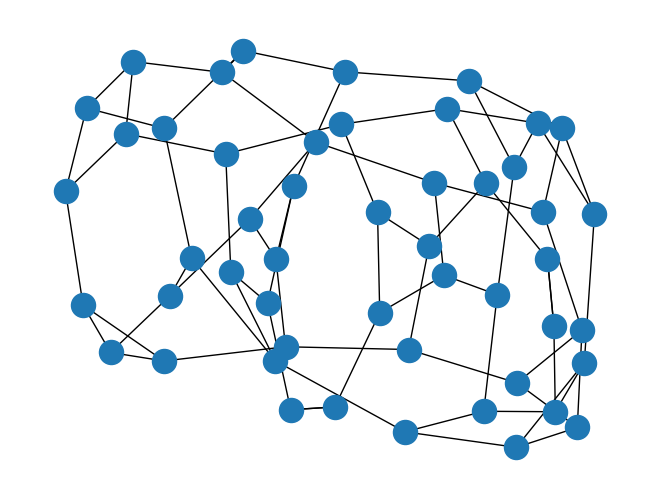

In [390]:
nx.draw(CM(d))

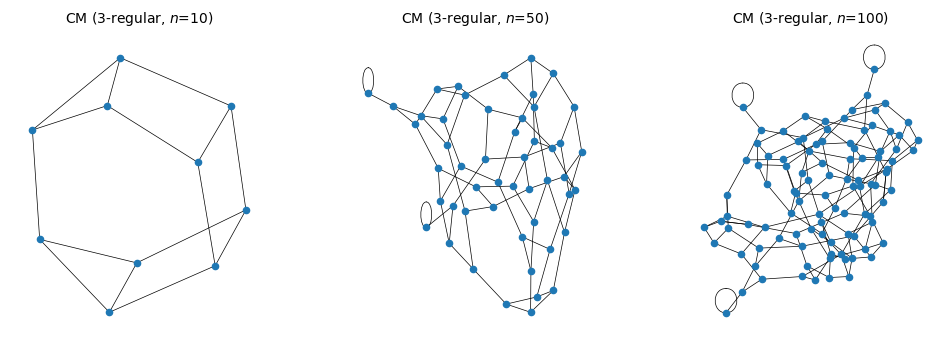

In [402]:
fig = plt.figure(figsize=[12,4], constrained_layout=False)
network_list = [""]
n_list=[10, 50, 100]
outer_grid = gridspec.GridSpec(nrows=1, ncols=len(n_list), wspace=0.3, hspace=0.1)

r = 3
clustering_list = [] 
path_length_list = []

for i in np.arange(len(n_list)): 
    deg_dist = [r]*n_list[i]
    G = CM(d=deg_dist)
    title = r"CM (${}$-regular, $n$={})".format(r, n_list[i])
    
    #degrees = [G.degree(n) for n in G.nodes()]

    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    #edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')
    #ax.legend()
    #title = title + "\n avg. cl. coeff.={}".format(np.round(nx.average_clustering(G0),3))
    ax.set_title(title, fontsize=10)


plt.savefig("CM_0", bbox_inches="tight")

## Hypothesis testing: Subgraph in Caltech

In [443]:
def p_value(x0, data_list):
    # computes p-value = P(random data point from data distribution > x0)
    excess_list = [x for x in data_list if x>=x0]
    return len(excess_list)/len(data_list)
    

Number of nodes: 769
Number of edges: 16656
Avg. clustering coefficient: 0.01
Avg. shortest path length: 4.8816161616161615
edge density: 0.05640442132639792


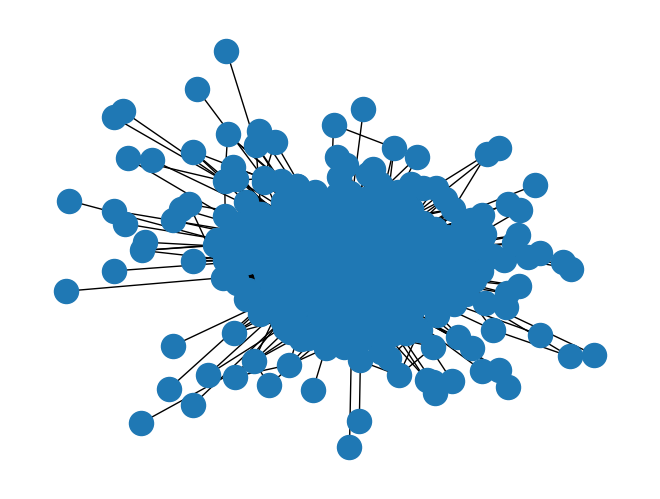

In [459]:
## Load Caltech Facebook graph

# Initialize graph 
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 
    
# Print out the number of nodes and edges in G

print("Number of nodes:", len(list(G.nodes())))
print("Number of edges:", len(list(G.edges())))
print("Avg. clustering coefficient:", nx.average_clustering(G0))
print("Avg. shortest path length:", nx.average_shortest_path_length(G0))
print("edge density:", nx.density(G))
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

# Compute the number of connected compoenents
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

nx.draw(G0)

Number of nodes: 87
Number of edges: 653


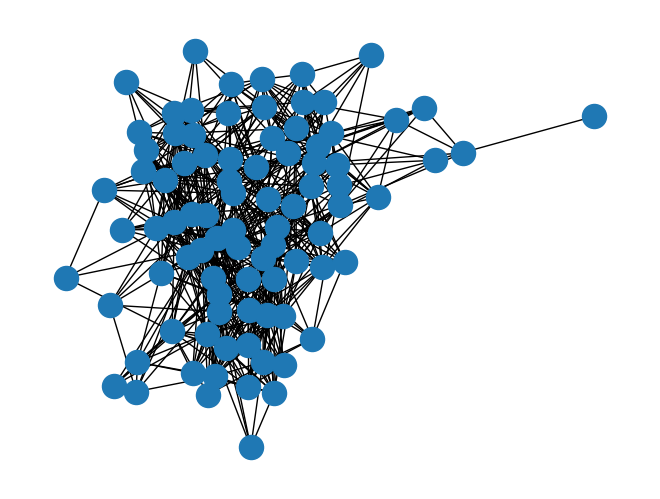

In [460]:
# Perform a random walk and take an induced subgraph on a random walk trajectory 
RW_trajectory = RW(G0, steps=100, return_history=True)
H = G.subgraph(nodes=RW_trajectory)
print("Number of nodes:", len(list(H.nodes())))
print("Number of edges:", len(list(H.edges())))
nx.draw(H)

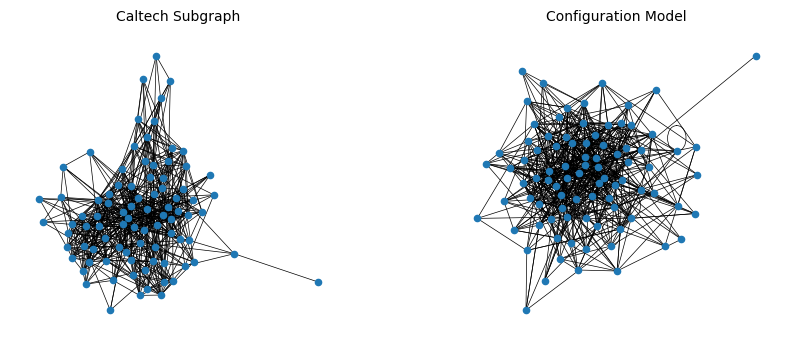

In [467]:
fig = plt.figure(figsize=[10,4], constrained_layout=False)
outer_grid = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.3, hspace=0.1)

degrees = [H.degree(v) for v in H.nodes()]
G = CM(d=degrees)

inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])
nx.draw(H, with_labels=False, width=weights, node_size=20, ax=ax)
ax.set_title("Caltech Subgraph", fontsize=10)

inner_grid = outer_grid[0,1].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])
nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax)
ax.set_title("Configuration Model", fontsize=10)

plt.savefig("CM_3", bbox_inches="tight")

In [461]:
from tqdm import trange

n_samples = 1000

statistics_list = ["avg. deg.", "avg. clustering coeff.", "avg. path length", "max matching"]

stats_list0 = []
stats_list1 = [] 
stats_list2 = []
stats_list3 = []

degrees = [H.degree(v) for v in H.nodes()]

for i in trange(n_samples): 
    G = CM(d = degrees)
    
    # convert multigraph G into a simple graph G00 
    G00 = nx.Graph()
    for e in G.edges():    
        G00.add_edge(e[0],e[1])
    G0 = G00
    
    avg_deg = np.mean(np.asarray([G.degree(v) for v in G.nodes()]))
    stats_list0.append(avg_deg)
    stats_list1.append(nx.average_clustering(G00))
    if nx.is_connected(G):
        stats_list2.append(nx.average_shortest_path_length(G))
    else:
        stats_list2.append(0)
        
    stats_list3.append(len(nx.maximal_matching(G00)))  

stats_list_all = [stats_list0, stats_list1, stats_list2, stats_list3]

100%|███████████████████████████████████████| 1000/1000 [00:23<00:00, 42.51it/s]


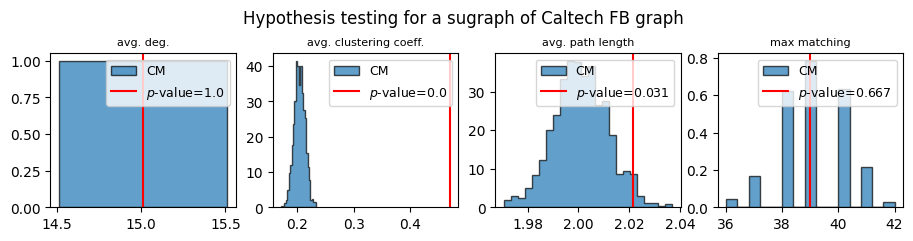

In [462]:
fig = plt.figure(figsize=[11,2], constrained_layout=False)

test_0 = np.mean(np.asarray(degrees))
test_1 = nx.average_clustering(H)
test_2 = nx.average_shortest_path_length(H)
test_3 = len(nx.maximal_matching(H))

outer_grid = gridspec.GridSpec(nrows=1, ncols=len(statistics_list), wspace=0.2, hspace=0.3)

for i in np.arange(len(statistics_list)): 
    if i == 0:
        test_0 = np.mean(np.asarray(degrees))
    elif i == 1:
        test_0 = nx.average_clustering(H)
    elif i == 2:
        test_0 = nx.average_shortest_path_length(H)
    elif i == 3:
        test_0 = len(nx.maximal_matching(H))
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0.1, hspace=0.1)
    ax = fig.add_subplot(inner_grid[0, 0])
    p0 = p_value(test_0, stats_list_all[i])
    ax.hist(stats_list_all[i], bins='auto', alpha=0.7, label="CM", edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    ax.set_title(statistics_list[i], fontsize=8)
    ax.axvline(x=test_0, color='r', label=r"$p$-value={}".format(p0))
    ax.legend(fontsize=9)

plt.suptitle("Hypothesis testing for a sugraph of Caltech FB graph", y=1.1)
plt.savefig("CM_hypothesis0", bbox_inches="tight")

## Hypothesis testing: CM graph

In [450]:
from tqdm import trange

degrees = [3]*100
H = CM(d = degrees)
H00 = nx.Graph()
for e in G.edges():    
    H00.add_edge(e[0],e[1])
H = H00

n_samples = 1000

statistics_list = ["avg. deg.", "avg. clustering coeff.", "avg. path length", "max matching"]

stats_list0 = []
stats_list1 = [] 
stats_list2 = []
stats_list3 = []

degrees = [H.degree(v) for v in H.nodes()]

for i in trange(n_samples): 
    G = CM(d = degrees)
    
    # convert multigraph G into a simple graph G00 
    G00 = nx.Graph()
    for e in G.edges():    
        G00.add_edge(e[0],e[1])
    G0 = G00
    
    avg_deg = np.mean(np.asarray([G.degree(v) for v in G.nodes()]))
    stats_list0.append(avg_deg)
    stats_list1.append(nx.average_clustering(G00))
    if nx.is_connected(G):
        stats_list2.append(nx.average_shortest_path_length(G))
    else:
        stats_list2.append(0)
        
    stats_list3.append(len(nx.maximal_matching(G00)))  

stats_list_all = [stats_list0, stats_list1, stats_list2, stats_list3]

100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 121.87it/s]


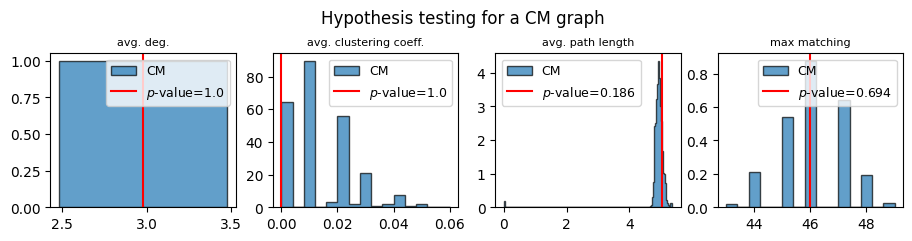

In [456]:
fig = plt.figure(figsize=[11,2], constrained_layout=False)

test_0 = np.mean(np.asarray(degrees))
test_1 = nx.average_clustering(H)
test_2 = nx.average_shortest_path_length(H)
test_3 = len(nx.maximal_matching(H))

outer_grid = gridspec.GridSpec(nrows=1, ncols=len(statistics_list), wspace=0.2, hspace=0.3)

for i in np.arange(len(statistics_list)): 
    if i == 0:
        test_0 = np.mean(np.asarray(degrees))
    elif i == 1:
        test_0 = nx.average_clustering(H)
    elif i == 2:
        test_0 = nx.average_shortest_path_length(H)
    elif i == 3:
        test_0 = len(nx.maximal_matching(H))
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0.1, hspace=0.1)
    ax = fig.add_subplot(inner_grid[0, 0])
    p0 = p_value(test_0, stats_list_all[i])
    ax.hist(stats_list_all[i], bins='auto', alpha=0.7, label="CM", edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    ax.set_title(statistics_list[i], fontsize=8)
    ax.axvline(x=test_0, color='r', label=r"$p$-value={}".format(p0))
    ax.legend(fontsize=9)

plt.suptitle("Hypothesis testing for a CM graph", y=1.1)
plt.savefig("CM_hypothesis1", bbox_inches="tight")